In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, skellam
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Getting the Data

In [ ]:
## We will be using Data from *football-data.co.uk*
### Specifically, from the Italian **Serie A**

from google.colab import files
uploaded = files.upload()
df = pd.read_excel('Serie A 23-24.xlsx')

Saving Serie A 23-24.xlsx to Serie A 23-24 (4).xlsx


In [ ]:
df = df[["Home", "Away", "Home Goals", "Away Goals"]] # selected columns
df.head(6)

,Home,Away,Home Goals,Away Goals
0,Empoli,Verona,0,1
1,Frosinone,Napoli,1,3
2,Genoa,Fiorentina,1,4
3,Inter,Monza,2,0
4,Roma,Salernitana,2,2
5,Sassuolo,Atalanta,0,2


## Building a Model



*   Will use Teams' matches - both, Home and Away - as well as Goals Scored by the Team
*   Will run every Match twice for each Team to get observation for each Team as a Home team and as an Away team



In [ ]:
goal_model_data = pd.concat([df[['Home', 'Away', 'Home Goals']].assign(home=1).rename(columns = {'Home': 'team', 'Away': 'opponent', 'Home Goals': 'goals'}),
                             df[['Away', 'Home', 'Away Goals']].assign(home=0).rename(columns = {'Away': 'team', 'Home': 'opponent', 'Away Goals': 'goals'})])

In [ ]:
goal_model_data.head(6)

,team,opponent,goals,home
0,Empoli,Verona,0,1
1,Frosinone,Napoli,1,1
2,Genoa,Fiorentina,1,1
3,Inter,Monza,2,1
4,Roma,Salernitana,2,1
5,Sassuolo,Atalanta,0,1


In [ ]:
# Example - Filtering out all Matches for "Inter Milan"

goal_model_data.loc[(goal_model_data['team'] == 'Inter')].sort_index(ascending=True)

,team,opponent,goals,home
3,Inter,Monza,2,1
19,Inter,Cagliari,2,0
26,Inter,Fiorentina,4,1
31,Inter,Milan,5,1
45,Inter,Empoli,1,0
54,Inter,Sassuolo,1,1
62,Inter,Salernitana,4,0
72,Inter,Bologna,2,1
81,Inter,Torino,3,0
96,Inter,Roma,1,1


## Running our Model

In [ ]:
# Fit the Model to the Data
## Home Advantage included
## Team and Opponent as Fixed Effects

# from scipy.stats import poisson, skellam
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

poisson_model = smf.glm(formula = "goals ~ home + team + opponent", data = goal_model_data,
                        family = sm.families.Poisson()).fit()

poisson_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  goals   No. Observations:                  760
Model:                            GLM   Df Residuals:                      720
Model Family:                 Poisson   Df Model:                           39
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1022.7
Date:                Tue, 08 Apr 2025   Deviance:                       718.14
Time:                        23:56:58   Pearson chi2:                     625.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2161
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.3878      0.200      1.937      0.053      -0.004       0.780
team[T.Bologna]            -0.2991      0.180     -1.659      0.097      -0.652       0.054
team[T.Cagliari]           -0.5128      0.194     -2.636      0.008      -0.894      -0.132
team[T.Empoli]             -0.8989      0.220     -4.083      0.000      -1.330      -0.467
team[T.Fiorentina]         -0.1620      0.174     -0.930      0.353      -0.504       0.180
team[T.Frosinone]          -0.4650      0.192     -2.426      0.015      -0.841      -0.089
team[T.Genoa]              -0.4681      0.190     -2.460      0.014      -0.841      -0.095
team[T.Inter]               0.1910      0.159      1.203      0.229      -0.120       0.502
team[T.Juventus]           -0.3002      0.180     -1.665      0.096      -0.653       0.053
team[T.Lazio]              -0.3891      0.185     -2.098      0.036      -0.753      -0.026
team[T.Lecce]              -0.8003      0.213     -3.762      0.000      -1.217      -0.383
team[T.Milan]               0.0619      0.165      0.376      0.707      -0.261       0.385
team[T.Monza]              -0.6052      0.199     -3.040      0.002      -0.995      -0.215
team[T.Napoli]             -0.2637      0.179     -1.470      0.141      -0.615       0.088
team[T.Roma]               -0.0983      0.171     -0.574      0.566      -0.434       0.238
team[T.Salernitana]        -0.7715      0.213     -3.626      0.000      -1.189      -0.354
team[T.Sassuolo]           -0.4816      0.193     -2.494      0.013      -0.860      -0.103
team[T.Torino]             -0.7011      0.204     -3.431      0.001      -1.102      -0.301
team[T.Udinese]            -0.6559      0.203     -3.238      0.001      -1.053      -0.259
team[T.Verona]             -0.6313      0.201     -3.144      0.002      -1.025      -0.238
opponent[T.Bologna]        -0.2919      0.235     -1.242      0.214      -0.752       0.169
opponent[T.Cagliari]        0.4511      0.197      2.294      0.022       0.066       0.836
opponent[T.Empoli]          0.2062      0.206      1.001      0.317      -0.198       0.610
opponent[T.Fiorentina]      0.0794      0.214      0.371      0.710      -0.340       0.498
opponent[T.Frosinone]       0.4679      0.196      2.387      0.017       0.084       0.852
opponent[T.Genoa]           0.0403      0.215      0.188      0.851      -0.381       0.461
opponent[T.Inter]          -0.6301      0.264     -2.391      0.017      -1.147      -0.114
opponent[T.Juventus]       -0.3237      0.237     -1.365      0.172      -0.788       0.141
opponent[T.Lazio]          -0.0989      0.223     -0.444      0.657      -0.535       0.338
opponent[T.Lecce]           0.2093      0.206      1.016      0.310      -0.194       0.613
opponent[T.Milan]           0.1591      0.211  

## Finding the Expected Mean Number of Goals

In [ ]:
home_team = 'Inter'
away_team = 'Napoli'

In [ ]:
home_score_rate = poisson_model.predict(pd.DataFrame(data = {'team': home_team, 'opponent': away_team,
                                                             'home': 1}, index = [1]))

away_score_rate = poisson_model.predict(pd.DataFrame(data = {'team': away_team, 'opponent': home_team,
                                                             'home': 0}, index = [1]))

print(home_team + ' against ' + away_team + ' expect to score: ' + str(home_score_rate))
print(away_team + ' against ' + home_team + ' expect to score: ' + str(away_score_rate))

Inter against Napoli expect to score: 1    2.441585
dtype: float64
Napoli against Inter expect to score: 1    0.602884
dtype: float64


## Match Simulation

In [ ]:
# Code to Calculate the Goals for the match:
def simulate_match(foot_model, homeTeam, awayTeam, max_goals = 10): # Default Value of Maximum Goals = 10
  home_goals_avg = foot_model.predict(pd.DataFrame(data = {'team': homeTeam,
                                                           'opponent': awayTeam, 'home': 1},
                                                   index = [1])).values[0]
  away_goals_avg = foot_model.predict(pd.DataFrame(data = {'team': awayTeam,
                                                           'opponent': homeTeam, 'home': 0},
                                                   index = [1])).values[0]
  team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals + 1)] for team_avg in [home_goals_avg, away_goals_avg]]
  return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

#^ This code uses 2 "for loop"s to Calculate the Poisson Probability Mass function for each Team's average Goals, and stored the results in the "team_pred" list

In [ ]:
# Same Code for the Loop^, in a Simpler Format

# for team_avg in [home_goals_avg, away_goals_avg]:
#   pred =[]
#   for i in range(0, max_goals + 1):
#     pred.append(stats.poisson.pmf(i, team_avg))
#   team_pred.append(pred)
# return (np.outer(np.array(team_pred[0]), np.array(team_pred[1])))

In [ ]:
# Specifying the Maximum number of Goals for the Simulation, manually

max_goals = 10

# Running the Simulation (Finally!)

score_matrix = simulate_match(poisson_model, home_team, away_team, max_goals)
score_matrix

array([[4.76216005e-02, 2.87102772e-02, 8.65447623e-03, 1.73921364e-03,
        2.62135803e-04, 3.16074701e-05, 3.17593704e-06, 2.73531435e-07,
        2.06134486e-08, 1.38083423e-09, 8.32482177e-11],
       [1.16272201e-01, 7.00985917e-02, 2.11306422e-02, 4.24643852e-03,
        6.40026930e-04, 7.71723353e-05, 7.75432128e-06, 6.67850338e-07,
        5.03294938e-08, 3.37142460e-09, 2.03257627e-10],
       [1.41944250e-01, 8.55758464e-02, 2.57961330e-02, 5.18402099e-03,
        7.81340181e-04, 9.42114208e-05, 9.46641854e-06, 8.15306793e-07,
        6.14418767e-08, 4.11581042e-09, 2.48135420e-10],
       [1.15522999e-01, 6.96469104e-02, 2.09944866e-02, 4.21907653e-03,
        6.35902907e-04, 7.66750742e-05, 7.70435620e-06, 6.63547034e-07,
        5.00051949e-08, 3.34970078e-09, 2.01947933e-10],
       [7.05148151e-02, 4.25122186e-02, 1.28149576e-02, 2.57530884e-03,
        3.88152802e-04, 4.68021840e-05, 4.70271076e-06, 4.05026676e-07,
        3.05229875e-08, 2.04464507e-09, 1.23268278e-

## Score Probabilities Matrix

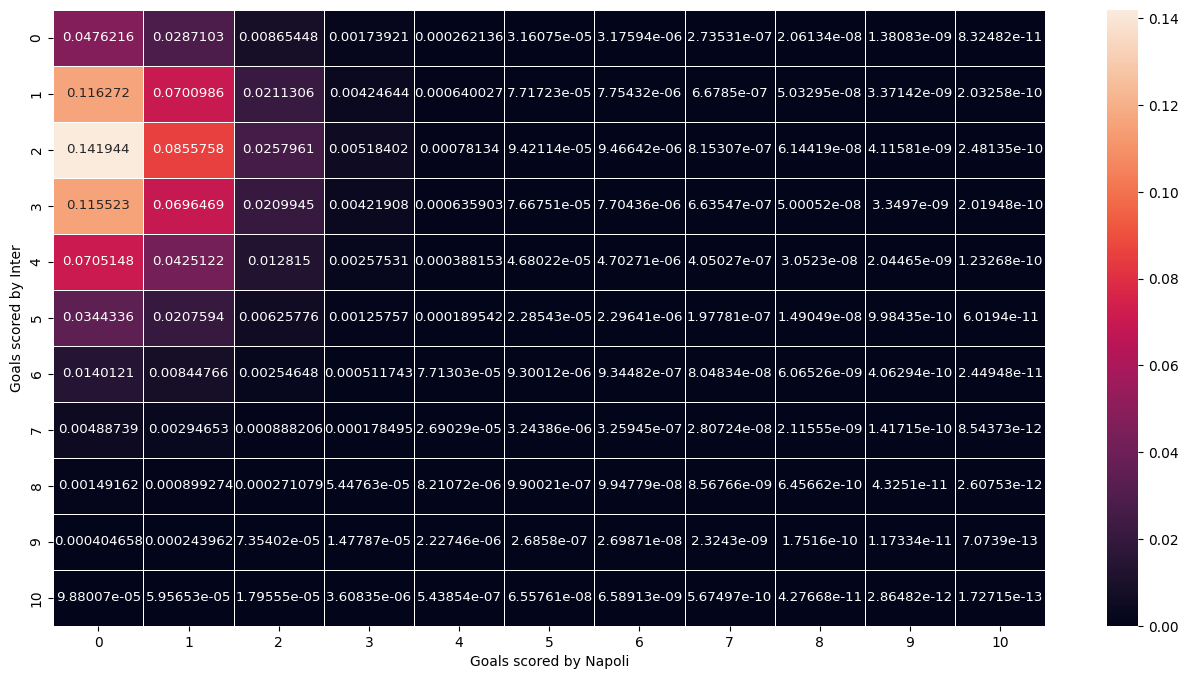

In [ ]:
import seaborn as sns

plt.figure(figsize=(16, 8))  # Increase figure size to make boxes larger
ax = sns.heatmap(score_matrix, fmt='g', annot_kws={"size": 9.65}, # "annot_kws": Controls Font Size within the Boxes
                 linewidth = 0.65, annot = True)
ax.set_xlabel('Goals scored by ' + away_team)
ax.set_ylabel('Goals scored by ' + home_team)
# ax.tick_params(axis='both', labelsize=12) | Sizes of the Tick Labels on each Respective Axis

plt.show()

## Calculating Outcomes' Probabilities

In [ ]:
# Home Win, Draw, Away Win Probabilities
homewin = np.sum(np.tril(score_matrix, -1))
draw = np.sum(np.diag(score_matrix))
awaywin = np.sum(np.triu(score_matrix, 1))

print(home_team + ' Win Probability: ' + str(round(homewin*100, 2)) + '%')
print('Draw Probability: ' + str(round(draw*100, 2)) + '%')
print(away_team + ' Win Probability: ' + str(round(awaywin*100, 2)) + '%')

print('---------------------------------------------')

round(homewin, 5), round(draw, 5), round(awaywin, 5)

Inter Win Probability: 77.95%
Draw Probability: 14.81%
Napoli Win Probability: 7.23%
---------------------------------------------


(np.float64(0.77945), np.float64(0.14815), np.float64(0.07235))